# 라이브러리 호출

In [3]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 제곱근 변환

In [1]:
import pandas as pd

# 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_변환.csv"
]

# 적용할 컬럼명 (파일에 따라 다를 수 있으므로 확인 필요)
column_name = "폐업-개업 비율"  # 실제 컬럼명이 다를 경우 수정 필요

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 제곱 변환 적용
    if column_name in df.columns:
        df[column_name] = df[column_name] ** 2
    else:
        print(f"파일 {file_path}에 '{column_name}' 컬럼이 없습니다.")

    # 변환된 데이터 저장
    df.to_csv(output_path, index=False, encoding="utf-8-sig")

print("변환 완료 및 저장 완료.")

변환 완료 및 저장 완료.


## 비율 분포 확인


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_변환.csv
count    33010.000000
mean         1.532016
std         41.868429
min          0.000000
25%          0.000000
50%          0.297521
75%          1.000000
max       5041.000000
Name: 폐업-개업 비율, dtype: float64


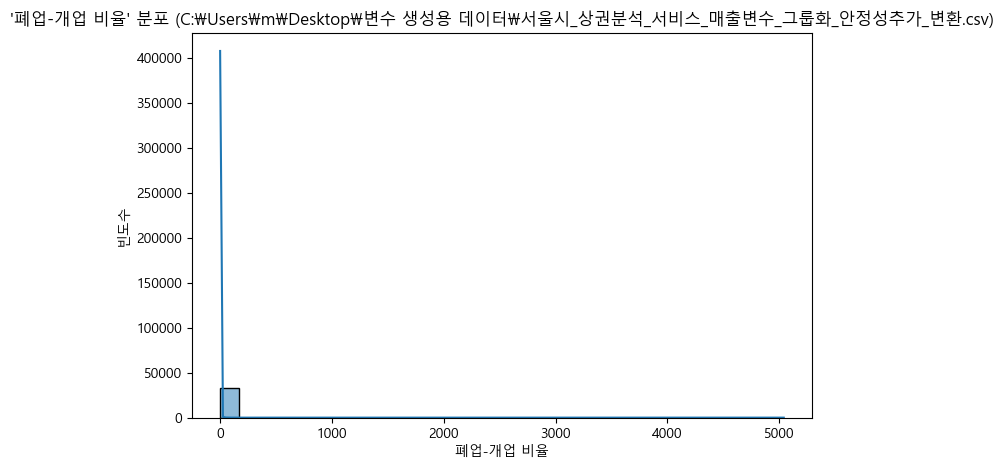


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_변환.csv
count    33462.000000
mean         1.996697
std         52.545445
min          0.000000
25%          0.177285
50%          0.521605
75%          1.000000
max       6889.000000
Name: 폐업-개업 비율, dtype: float64


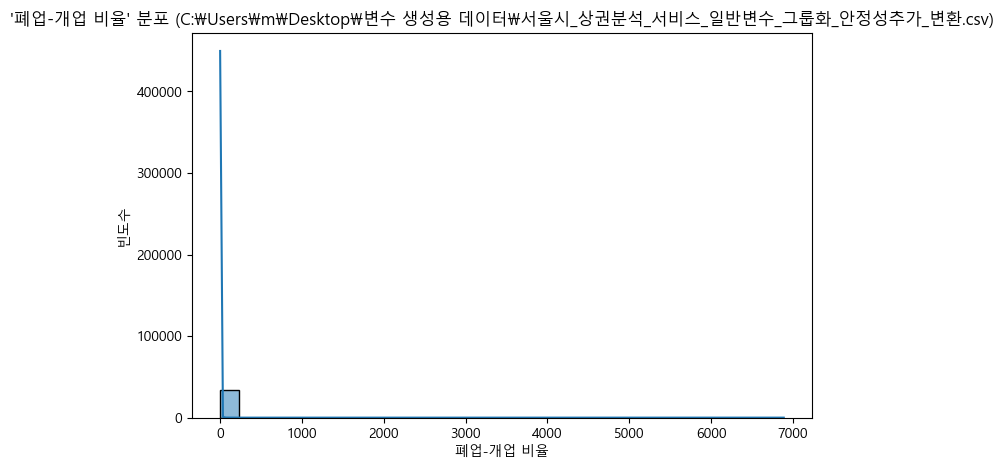

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_변환.csv"
]

# 적용할 컬럼명 (실제 컬럼명이 다를 수 있음)
column_name = "폐업-개업 비율"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        data = df[column_name]
        
        # 기본 통계량 출력
        print(f"\n📌 파일: {file_path}")
        print(data.describe())  # count, mean, std, min, 25%, 50%, 75%, max
        
        # 히스토그램과 KDE (밀도 함수) 그래프 출력
        plt.figure(figsize=(8, 5))
        sns.histplot(data, bins=30, kde=True)
        plt.title(f"'{column_name}' 분포 ({file_path.split('/')[-1]})")
        plt.xlabel(column_name)
        plt.ylabel("빈도수")
        plt.show()
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

# Yeo-Johnson 변환

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

# 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv"
]

# 적용할 컬럼명
column_name = "폐업-개업 비율"

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 변환 적용
    if column_name in df.columns:
        # 결측치 제거 (PowerTransformer는 NaN을 처리할 수 없음)
        df[column_name] = df[column_name].fillna(df[column_name].median())

        # Yeo-Johnson 변환 적용
        pt = PowerTransformer(method="yeo-johnson")
        df[column_name] = pt.fit_transform(df[[column_name]])

        # 변환된 데이터 저장
        df.to_csv(output_path, index=False, encoding="utf-8-sig")
        print(f"✅ {output_path} 저장 완료.")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv 저장 완료.
✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv 저장 완료.


## 비율 분포 확인


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv
count    3.301000e+04
mean     1.980711e-16
std      1.000015e+00
min     -1.331939e+00
25%     -1.331939e+00
50%      9.427108e-02
75%      7.784042e-01
max      4.376982e+00
Name: 폐업-개업 비율, dtype: float64


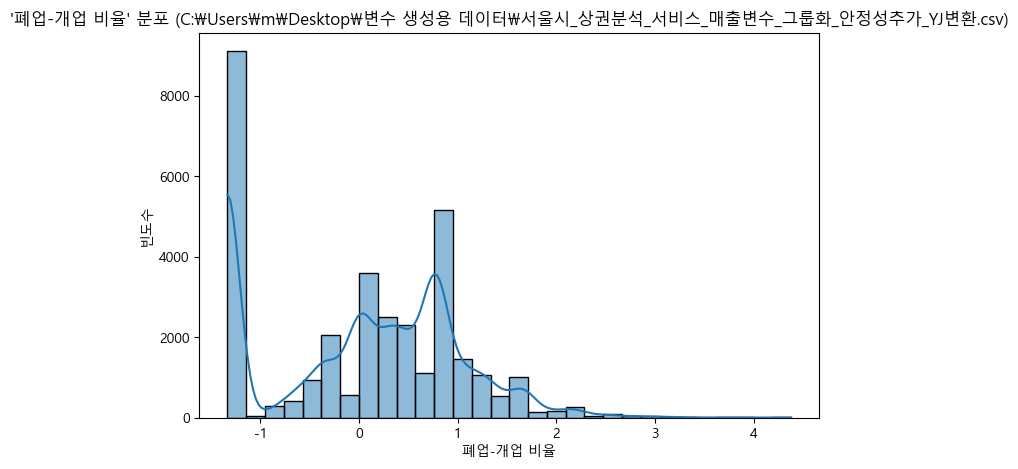


📌 파일: C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv
count    3.346200e+04
mean    -2.998286e-16
std      1.000015e+00
min     -1.903072e+00
25%     -5.741304e-01
50%      5.168895e-02
75%      4.950015e-01
max      5.022361e+00
Name: 폐업-개업 비율, dtype: float64


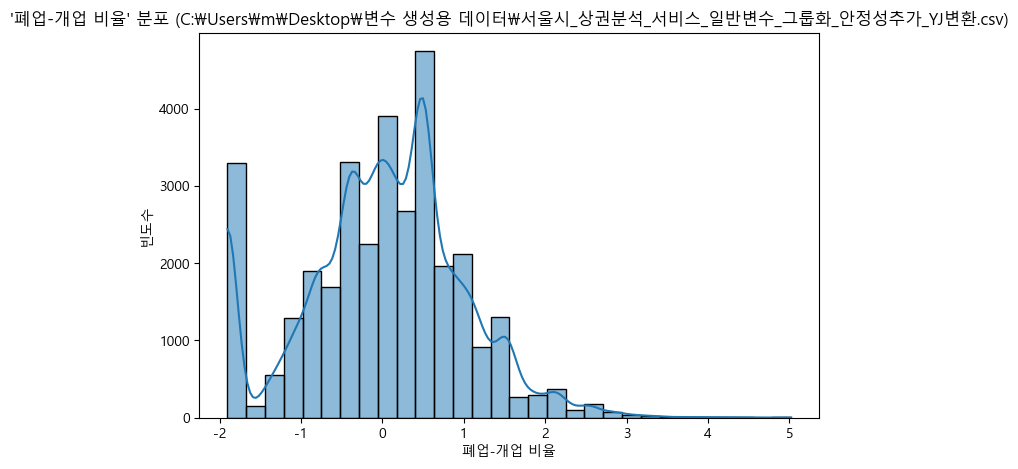

In [7]:
# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv"
]

# 적용할 컬럼명 (실제 컬럼명이 다를 수 있음)
column_name = "폐업-개업 비율"

for file_path in file_paths:
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 컬럼 존재 여부 확인
    if column_name in df.columns:
        data = df[column_name]
        
        # 기본 통계량 출력
        print(f"\n📌 파일: {file_path}")
        print(data.describe())  # count, mean, std, min, 25%, 50%, 75%, max
        
        # 히스토그램과 KDE (밀도 함수) 그래프 출력
        plt.figure(figsize=(8, 5))
        sns.histplot(data, bins=30, kde=True)
        plt.title(f"'{column_name}' 분포 ({file_path.split('/')[-1]})")
        plt.xlabel(column_name)
        plt.ylabel("빈도수")
        plt.show()
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

# 안정성 변수 재정의

In [8]:
import pandas as pd

# 변환된 파일 경로
file_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_YJ변환.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_YJ변환.csv"
]

# 출력 파일 경로
output_paths = [
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv",
    r"C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv"
]

# 적용할 컬럼명
column_name = "폐업-개업 비율"
new_column = "안정성"

# 기준값
threshold = -2.998286e-16

for file_path, output_path in zip(file_paths, output_paths):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 컬럼 존재 여부 확인 후 안정성 컬럼 생성
    if column_name in df.columns:
        df[new_column] = df[column_name].apply(lambda x: "안정" if x <= threshold else "불안정")

        # 변환된 데이터 저장
        df.to_csv(output_path, index=False, encoding="utf-8-sig")
        print(f"✅ {output_path} 저장 완료.")
    else:
        print(f"⚠ '{column_name}' 컬럼이 {file_path}에 없습니다.")

✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_매출변수_그룹화_안정성추가_최종.csv 저장 완료.
✅ C:\Users\m\Desktop\변수 생성용 데이터\서울시_상권분석_서비스_일반변수_그룹화_안정성추가_최종.csv 저장 완료.
